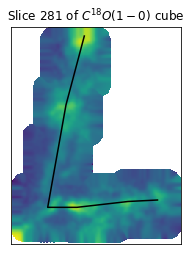

In [1]:
from pvextractor import Path
from pvextractor import extract_pv_slice
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline 
from astropy.io import fits
from astropy.wcs import WCS
from spectral_cube import SpectralCube
import matplotlib.ticker as tck

#files are L1641S_C18O10, L1641S_HCO+10, L1641S_HNC10, L1641S_N2H+10

cubefile = ['L1641S_C18O10', 'L1641S_HCO+10', 'L1641S_HNC10', 'L1641S_N2H+10']
ridgeline1 = [(100., 289.), (54., 30.),(228.,58.)] #path chosen in the first try
ridgeline2 = [(120., 284.), (30., 64.), (60.,32.), (228.,58.)]
ridgeline3 = [(100., 289.), (30., 25.),(228.,69.)]
ridgeline4 = [(100., 284.), (75.,190.), (50., 50.), (90., 50.), (160.,58.), (200., 60.)]

#Now we have to define the path, sadly we have to do it manualy:

path1= Path([(100., 289.), (54., 30.),(228.,58.)],width=40)
path2= Path([(120., 284.), (30., 64.), (60.,32.), (228.,58.)],width=40)
path3= Path([(100., 289.), (30., 25.),(228.,69.)],width=40)
path4= Path([(100., 284.), (75.,190.), (50., 50.), (90., 50.), (160.,58.), (200., 60.)],width=40)

#select the desired path:
width=40
ridgeline=ridgeline4
path=path4

#lets extract and plot slide 281 to visualize the chosen path
hdulist = fits.open('/home/asus/AnacondaProjects/Data/FitsCubes/L1641S_C18O10.fits')
hdu=hdulist[0]
image=281
plt.imshow(hdu.data[0,image,:,:],origin='lower')
#plt.scatter(*zip(*ridgeline), s=500, facecolors='none', marker='o') #with this we plot the reference points
plt.title('Slice %s of $C^{18}O (1-0)$ cube'%image)
plt.xticks([])
plt.yticks([])
plt.plot(*zip(*ridgeline), 'k-')
plt.savefig('substructures/C18O_PV_clumps.png',dpi=500,bbox_inches='tight' )
plt.savefig('/home/asus/Documents/Latex/Master_Thesis3/figures/C18O_PV_clumps.png',dpi=500,bbox_inches='tight' )


#patches.Rectangle(((ridgeline[1][0])-(width/2),ridgeline[1][0]), width, sqrt( (ridgeline[0][0] - ridgeline[1][0])**2 + (ridgeline[0][1] - ridgeline[1][1])**2 ), angle=0.0

plt.show()

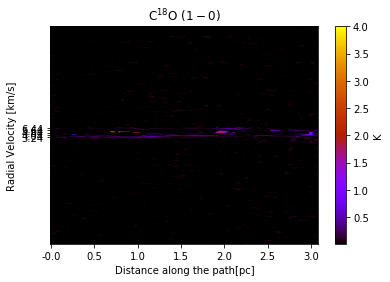

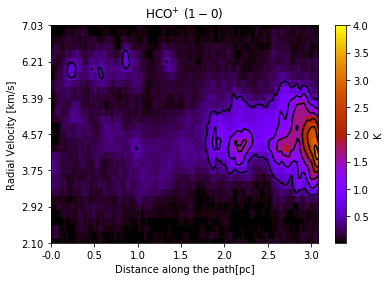

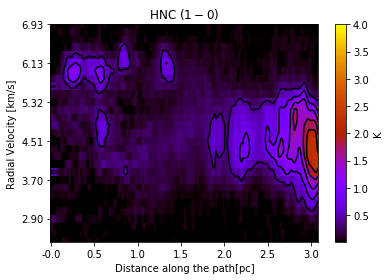

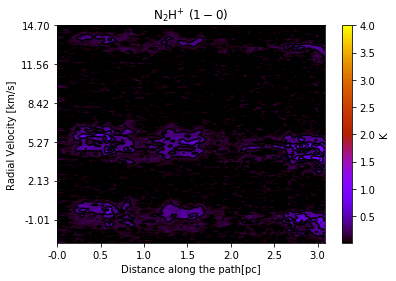

In [4]:
from pvextractor import Path
from pvextractor import extract_pv_slice
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from astropy.io import fits
from astropy.wcs import WCS
from spectral_cube import SpectralCube
import matplotlib.ticker as tck


cubefile = ['L1641S_C18O10', 'L1641S_HCO+10', 'L1641S_HNC10', 'L1641S_N2H+10']

for i in cubefile:

    c = 'extractions/extraction%s.fits'%(i)
    hdu = fits.open(c)[0]
    data = hdu.data
    header=hdu.header

    #lets compute the pixel size in parsec

    pixel_length_degres=header['CDELT1']

    pixel_length_radians = (pixel_length_degres)*math.pi/180    #180/pi  =  lpx/radians
    dorion=414
    pixel_length_pc = dorion*math.tan(pixel_length_radians) #longitud del pixel en parsec

    #similarly we have the velocities in m s-1 and we have to transform it to km s-1

    pixel_velocity_ms=-header['CDELT2']

    pixel_velocity_kms=pixel_velocity_ms/1000

    #now we make the translation of the axis & plot the image

    def Transx(x,pos):
        x=pixel_length_pc*(x-header['CRPIX1'])
        return"{:1.1f}".format(x)

    def Transy(v,velocity):
        v=pixel_velocity_kms*(v-header['CRPIX2'])
        return"{:1.2f}".format(v)


    fig = plt.figure()
    
    ax=plt.gca()
    ax.xaxis.set_major_formatter(tck.FuncFormatter(Transx))
    ax.yaxis.set_major_formatter(tck.FuncFormatter(Transy))

    #axx = plt.axes()
    
    ax.xaxis.set_major_locator(tck.MultipleLocator(63))
    
    plt.imshow(data,vmin=0.01,vmax=4,cmap='gnuplot',origin='lower')
    
    #cmap='nipy_spectral'
    #gnuplot, plasma, seismic, cubehelix, magma_r, inferno_r
    #winners: gist_heat_r, hot_r
    plt.xlabel('Distance along the path[pc]')
    plt.ylabel(r'Radial Velocity [km/s]')
    plt.axis('tight')
    cbar = plt.colorbar()
    plt.contour(data, colors='k')

    cbar.set_label('K')
    
    
    #files are 'L1641S_C18O10', 'L1641S_HCO+10', 'L1641S_HNC10', 'L1641S_N2H+10'
    #ylimits= np.array([[260-header['CRPIX2'],295-header['CRPIX2']], [260-header['CRPIX2'],295-header['CRPIX2']], [260-header['CRPIX2'],295-header['CRPIX2']], [260-header['CRPIX2'],295-header['CRPIX2']]])

    if i=='L1641S_C18O10':
        #plt.ylim(265,300)
        #plt.ylim(200,300)

        plt.title('C$^{18}$O ($1-0$)')
        plt.yticks(np.arange(271, 300, step=6))

    elif i=='L1641S_HCO+10':
        
        plt.ylim(260,290)
        plt.title('HCO$^{+}$ ($1-0$)')

    elif i=='L1641S_HNC10':
        
        plt.ylim(262,290)
        plt.title('HNC ($1-0$)')

    elif i=='L1641S_N2H+10':
        
        plt.ylim(570,850)
        plt.title('N$_{2}$H$^{+}$ ($1-0$)')
    
    else:
        
        print('no y limits have been set')
    #plt.arrow(260, 285, 5, 5, head_width=5, head_length=10, fc='k', ec='k')
    plt.savefig('images/%s.png'%(i),dpi=500, bbox_inches='tight',pad_inches=0.1)
    #plt.savefig('/home/asus/Documents/Latex/Master_Thesis3/figures/%s.png'%(i),dpi=500, bbox_inches='tight',pad_inches=0.1)

    plt.show()

In [24]:
help(set_major_locator)

NameError: name 'set_major_locator' is not defined